In [1]:
from numpy.lib.format import open_memmap
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [2]:
import pickle
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Get indices corresponding to clothing

In [3]:
import pickle

# Open the pickle file in read binary mode
with open('/content/gdrive/MyDrive/mit-nlp-project/val_pred_lab_dct.pickle', 'rb') as file:
    val_pred_lab_dct = pickle.load(file)

FileNotFoundError: ignored

In [ ]:
# Access and use the loaded data
print(val_pred_lab_dct.keys())

print(len(val_pred_lab_dct[0.01]))

# for each eval point:
print(val_pred_lab_dct[0.01][0]) # model prediction (scores pre-softmax)?
print(val_pred_lab_dct[0.01][1]) # true class label?

dict_keys([0.01, 0.05, 0.1])
2
[[-1.762284   -2.2087116  -5.1063824   6.531777  ]
 [-1.233419    6.025657   -5.5111213  -1.3381301 ]
 [ 6.5512114  -2.3802943  -5.055002   -1.6377735 ]
 ...
 [-0.43598825 -2.7176886   4.4770513  -1.841337  ]
 [-1.0491346  -2.5682936   4.5298767  -1.5896866 ]
 [ 5.5582967  -3.3430254  -2.8239508  -1.4856749 ]]
[3 1 0 ... 2 2 2]


In [ ]:
# Fetch indices of value 2 using list comprehension
indices_0 = [index for index, value in enumerate(val_pred_lab_dct[0.01][1]) if value == 0]
indices_1 = [index for index, value in enumerate(val_pred_lab_dct[0.01][1]) if value == 1]
indices_2 = [index for index, value in enumerate(val_pred_lab_dct[0.01][1]) if value == 2]
indices_3 = [index for index, value in enumerate(val_pred_lab_dct[0.01][1]) if value == 3]

print(len(indices_0))
print(len(indices_1))
print(len(indices_2))
print(len(indices_3))

print(indices_2[0]) # (11/29) range of clothing: [6263:14846]

2891
1648
8583
1724
6263


In [ ]:
# Find clothing indices in each hold-out mmap file.
indices2_0_5 = [index for index, value in enumerate(val_pred_lab_dct[0.05][1]) if value == 2]
indices2_0_10 = [index for index, value in enumerate(val_pred_lab_dct[0.10][1]) if value == 2]

In [ ]:
print(indices2_0_5[0])
print(indices2_0_5[-1])
print(indices2_0_10[0])
print(indices2_0_10[-1])

6263
14498
6263
14065


### Final Scores (0%, 1%, 10%, 100% clothing in training)

In [ ]:
# OOD points for each of the values in the sweep.
_scores_val_0_0 = open_memmap(f"/content/gdrive/MyDrive/mit-nlp-project/final_0.0/scores/test_TRAK_val.mmap") # jyh: 12/03: FINAL (eval: all clothing 500 pts. train: fraction of clothing kept during training.)
_scores_val_0_01 = open_memmap(f"/content/gdrive/MyDrive/mit-nlp-project/final_0.01/scores/test_TRAK_val.mmap") # jyh 11/27: how do we know which validation points correspond to clothing items?
_scores_val_0_1 = open_memmap(f"/content/gdrive/MyDrive/mit-nlp-project/final_0.1/scores/test_TRAK_val.mmap")
_scores_val_1_0 = open_memmap(f"/content/gdrive/MyDrive/mit-nlp-project/final_1/scores/test_TRAK_val.mmap")

In [ ]:
_scores_val_0_0[:10]

memmap([[ 5.782e-06,  3.994e-06, -7.749e-06, ...,  3.099e-06, -4.709e-06,
         -1.955e-05],
        [-6.974e-06, -2.038e-05,  4.649e-05, ...,  1.431e-06, -1.532e-05,
          4.011e-05],
        [-3.827e-05, -9.263e-05, -4.601e-05, ..., -6.467e-05, -1.800e-05,
         -1.031e-05],
        ...,
        [ 4.172e-07, -6.497e-06,  1.311e-06, ...,  1.550e-06,  4.053e-06,
          5.960e-08],
        [-2.444e-06, -6.676e-06, -1.484e-05, ...,  8.345e-07, -2.396e-05,
          1.132e-06],
        [-1.609e-06, -6.974e-06, -1.192e-07, ..., -1.216e-05, -7.391e-06,
          5.186e-06]], dtype=float16)

In [ ]:
import random

def get_raw_randomized(eval_by_train, num_scores_per_eval):
  """
  Function that gets randomized TRAK scores (useful for plotting sparser histograms)
  """
  values=[]
  len_eval = len(eval_by_train)
  for i in range(len_eval): # for each eval point
      trak_scores = random.sample(list(eval_by_train[i]), num_scores_per_eval) # randomly pick out 1000 trak scores for each eval point.
      for j in range(len(trak_scores)):
          values.append(trak_scores[j])
  return values

In [ ]:
### Look at first 1000 points and 50 TRAK scores for each Eval point.
scores_raw_0_00 = get_raw_randomized(_scores_val_0_0[:250], 250) # out-of-distribution points
scores_raw_0_01 = get_raw_randomized(_scores_val_0_01[:250], 250)
scores_raw_0_1 = get_raw_randomized(_scores_val_0_1[:250], 250)
scores_raw_1_0 = get_raw_randomized(_scores_val_1_0[:250], 250)

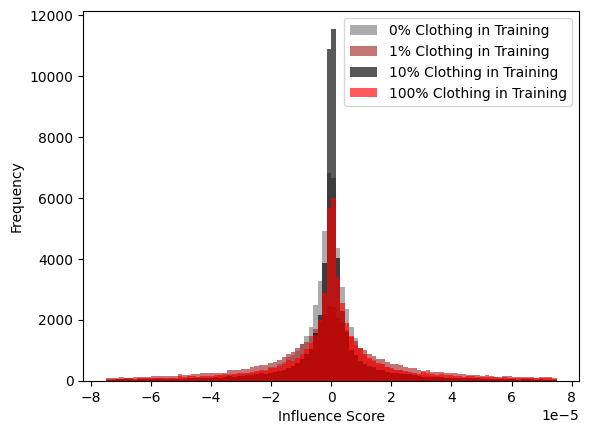

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms
plt.hist(scores_raw_0_00, bins=100, range =(-.000075,.000075), alpha=0.65, color='grey', label='0% Clothing in Training')
plt.hist(scores_raw_0_01, bins=100, range =(-.000075,.000075), alpha=0.65, color='brown', label='1% Clothing in Training')
plt.hist(scores_raw_0_1, bins=100, range =(-.000075,.000075), alpha=0.65, color='black', label='10% Clothing in Training')
plt.hist(scores_raw_1_0, bins=100, range =(-.000075,.000075), alpha=0.65, color='red', label='100% Clothing in Training')


# Adding labels and legend
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
# plt.title('Comparison of 0.0% Clothing vs 10% Clothing')
plt.legend()

plt.savefig("subpop_histogram.png", bbox_inches='tight')

# Show plot
plt.show()

In [ ]:
print(np.mean(scores_raw_0_00)) # 0% clothing data in training
print(np.mean(scores_raw_0_01))
print(np.mean(scores_raw_0_1)) # 10% subpopulation mean.
print(np.mean(scores_raw_1_0))

2.074e-05
1.45e-05
-3.934e-05
1.7e-06


In [ ]:
print(np.std(scores_raw_0_00)) # 0% clothing data in training
print(np.std(scores_raw_0_01))
print(np.std(scores_raw_0_1))
print(np.std(scores_raw_1_0))

0.000772
0.003435
0.00458
0.003069


In [ ]:
from scipy import stats

# Perform one-way ANOVA for detecting difference between means in AT LEAST one group
f_statistic, p_value = stats.f_oneway(scores_raw_0_00, scores_raw_0_01, scores_raw_0_1, scores_raw_1_0)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value) # there is a significant difference between at least one pair of group means.

F-Statistic: 4.705496154169838
P-Value: 0.002751282001659557


In [ ]:
# there is a significant difference between the means of the 00 and 10 groups.
from scipy import stats

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(scores_raw_0_00, scores_raw_0_1)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 3.417941406140624
P-Value: 0.0006311678908923973


In [ ]:
# there is a significant difference between the means of the 100 and 10 groups.
from scipy import stats

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(scores_raw_1_0, scores_raw_0_1)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.9714697146046756
P-Value: 0.04867237570770034


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1074: RuntimeWarning: overflow encountered in divide
  rel_diff = np.max(np.abs(a_zero_mean), axis=axis,


## Examining Influence Scores Per Evaluation Point



In [ ]:
import random

def get_list_of_lists(eval_by_train, num_scores_per_eval):
  """
  Function that gets randomized TRAK scores (useful for plotting sparser histograms)
  """
  list_of_lists = [] # inner list: dim=eval_point x outer list: dim=training_point
  len_eval = len(eval_by_train)
  for i in range(len_eval): # for each eval point
      trak_scores = random.sample(list(eval_by_train[i]), num_scores_per_eval) # randomly pick out 1000 trak scores for each eval point.
      list_of_lists.append(trak_scores)
      # for j in range(len(trak_scores)):
      #    values.append(trak_scores[j])
  return list_of_lists

In [ ]:
LoL_val_0_0 = get_list_of_lists(_scores_val_0_0[:250], 250)
LoL_val_0_01 = get_list_of_lists(_scores_val_0_01[:250], 250)
LoL_val_0_1 = get_list_of_lists(_scores_val_0_1[:250], 250)
LoL_val_1_0 = get_list_of_lists(_scores_val_1_0[:250], 250)

In [ ]:
def get_per_evalpoint_stats(LoL):
  # returns a list of means and a list of variances,
  # each element representing a mean,var for each evaluation point.
  means_0_0 = [] # each entry corresponds to the mean trak score for each eval point.
  vars_0_0 = []
  for eval_point_lst in LoL:
    means_0_0.append(np.mean(eval_point_lst))
    vars_0_0.append(np.var(eval_point_lst))
  return means_0_0, vars_0_0

In [ ]:
means_0_0, vars_0_0 = get_per_evalpoint_stats(LoL_val_0_0)
means_0_01, vars_0_01 = get_per_evalpoint_stats(LoL_val_0_01)
means_0_1, vars_0_1 = get_per_evalpoint_stats(LoL_val_0_1)
means_1_0, vars_1_0 = get_per_evalpoint_stats(LoL_val_1_0)

In [ ]:
print(np.mean(vars_0_0)) # smallest (1)
print(np.mean(vars_0_01)) # third smallest (3)
print(np.mean(vars_0_1)) # largest (4)
print(np.mean(vars_1_0)) # second smallest (2)

5e-07
1.11e-05
1.41e-05
9.9e-06


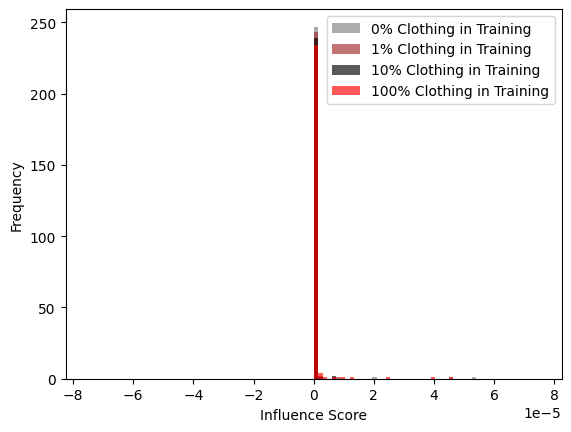

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms
plt.hist(vars_0_0, bins=100, range =(-.000075,.000075), alpha=0.65, color='grey', label='0% Clothing in Training')
plt.hist(vars_0_01, bins=100, range =(-.000075,.000075), alpha=0.65, color='brown', label='1% Clothing in Training')
plt.hist(vars_0_1, bins=100, range =(-.000075,.000075), alpha=0.65, color='black', label='10% Clothing in Training')
plt.hist(vars_1_0, bins=100, range =(-.000075,.000075), alpha=0.65, color='red', label='100% Clothing in Training')

# Adding labels and legend
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
# plt.title('Comparison of 0.0% Clothing vs 10% Clothing')
plt.legend()

# plt.savefig("subpop_histogram.png", bbox_inches='tight')

# Show plot
plt.show()

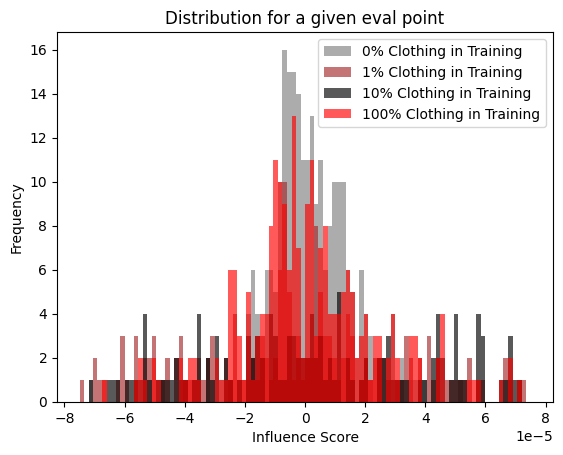

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms
plt.hist(LoL_val_0_0[12], bins=100, range =(-.000075,.000075), alpha=0.65, color='grey', label='0% Clothing in Training')
plt.hist(LoL_val_0_01[10], bins=100, range =(-.000075,.000075), alpha=0.65, color='brown', label='1% Clothing in Training')
plt.hist(LoL_val_0_1[14], bins=100, range =(-.000075,.000075), alpha=0.65, color='black', label='10% Clothing in Training')
plt.hist(LoL_val_1_0[20], bins=100, range =(-.000075,.000075), alpha=0.65, color='red', label='100% Clothing in Training')

# Adding labels and legend
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.title('Distribution for a given eval point')
plt.legend()

# plt.savefig("subpop_histogram.png", bbox_inches='tight')

# Show plot
plt.show()

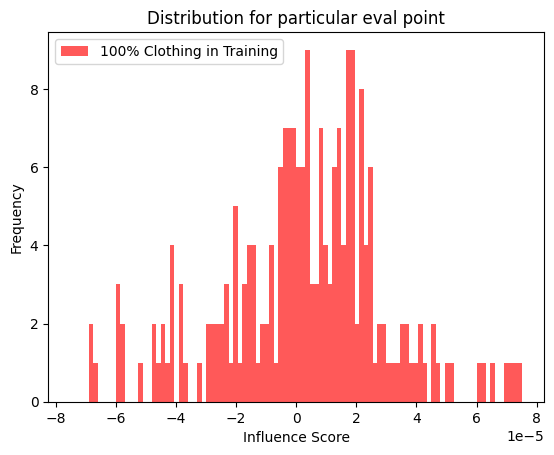

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms
# plt.hist(LoL_val_0_0[15], bins=100, range =(-.000075,.000075), alpha=0.65, color='grey', label='0% Clothing in Training')
# plt.hist(LoL_val_0_01[10], bins=100, range =(-.000075,.000075), alpha=0.65, color='brown', label='1% Clothing in Training')
# plt.hist(LoL_val_0_1[6], bins=100, range =(-.000075,.000075), alpha=0.65, color='black', label='10% Clothing in Training')
plt.hist(LoL_val_1_0[5], bins=100, range =(-.000075,.000075), alpha=0.65, color='red', label='100% Clothing in Training')

# Adding labels and legend
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.title('Distribution for particular eval point')
plt.legend()

# plt.savefig("subpop_histogram.png", bbox_inches='tight')

# Show plot
plt.show()

## Get Clothing Scores for Each Proportion OOD File

In [ ]:
_scores_val_1_0.shape # train x eval

(10085, 500)

In [ ]:
# clothing scores
len(_scores_val_0_01.T[6263:14846][0]) # length of scores for the first clothing eval point.
clothing_0_01 = _scores_val_0_01.T[6263:14846]

In [ ]:
_scores_val_0_05.shape

(29661, 14499)

In [ ]:
# clothing scores
print(len(_scores_val_0_05.T[6263:14498][0])) # length of scores for the first clothing eval point.
clothing_0_05 = _scores_val_0_05.T[6263:14498]

29661


In [ ]:
_scores_val_0_10.shape

(30094, 14066)

In [ ]:
# clothing scores
print(len(_scores_val_0_10.T[6263:14065][0])) # length of scores for the first clothing eval point.
clothing_0_10 = _scores_val_0_10.T[6263:14065]
clothing_0_10.shape

30094


(7802, 30094)

In [ ]:
# Clothing labels correspond to hoo for level 0.0
clothing_0_00 = _scores_hoo_0_0.T
clothing_0_00.shape

(8670, 29227)

## Run Summary Statistics on Raw Scores

In [ ]:
def get_raw(scores):
    values = []
    for i in range(len(scores)):
        sc = scores[i]
        for j in range(len(sc)):
            values.append(sc[j])
    return values

In [ ]:
### Look at first 1000 points
scores_raw_0_00 = get_raw(clothing_0_00[:100]) # out-of-distribution points
scores_raw_0_01 = get_raw(clothing_0_01[:100])
scores_raw_0_05 = get_raw(clothing_0_05[:100])
scores_raw_0_10 = get_raw(clothing_0_10[:100])

In [ ]:
## Comparing means (OOD points with varying levels of subpopulation shift.)
print(np.mean(scores_raw_0_00))
print(np.mean(scores_raw_0_01))
print(np.mean(scores_raw_0_05))
print(np.mean(scores_raw_0_10))

# The means got larger with an increase in the proportion of clothing we left out.

7.343e-05
8.8e-06
3.49e-05
-9e-07


In [ ]:
## Comparing stds (OOD points with varying levels of subpopulation shift.)
print(np.std(scores_raw_0_00))
print(np.std(scores_raw_0_01))
print(np.std(scores_raw_0_05))
print(np.std(scores_raw_0_10))

# The standard deviations got larger with an increase in the proportion of clothing we left out.

0.02037
0.013855
0.008804
0.005226


### Run Statistical Tests

### Plot Histograms

In [ ]:
import random

def get_raw_randomized(eval_by_train, num_scores_per_eval):
  """
  Function that gets randomized TRAK scores (useful for plotting sparser histograms)
  """
  values=[]
  len_eval = len(eval_by_train)
  for i in range(len_eval): # for each eval point
      trak_scores = random.sample(list(eval_by_train[i]), num_scores_per_eval) # randomly pick out 1000 trak scores for each eval point.
      for j in range(len(trak_scores)):
          values.append(trak_scores[j])
  return values

In [ ]:
### Look at first 1000 points and 50 TRAK scores for each Eval point.
scores_raw_0_00 = get_raw_randomized(clothing_0_00[:100], 50) # out-of-distribution points
scores_raw_0_01 = get_raw_randomized(clothing_0_01[:100], 50)
scores_raw_0_05 = get_raw_randomized(clothing_0_05[:100], 50)
scores_raw_0_10 = get_raw_randomized(clothing_0_10[:100], 50)

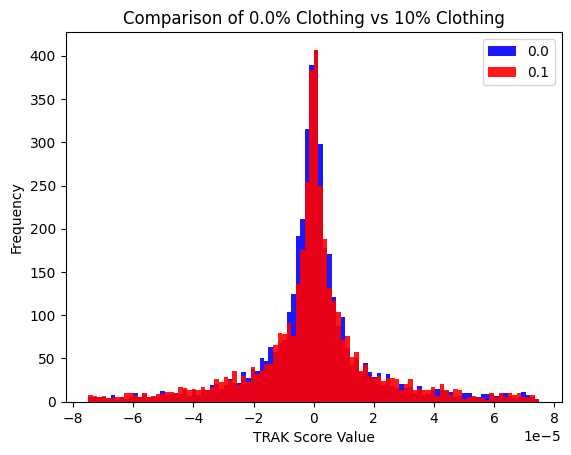

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms
plt.hist(scores_raw_0_00, bins=100, range =(-.000075,.000075), alpha=0.9, color='blue', label='0.0')
plt.hist(scores_raw_0_10, bins=100, range =(-.000075,.000075), alpha=0.9, color='red', label='0.1')

# Adding labels and legend
plt.xlabel('TRAK Score Value')
plt.ylabel('Frequency')
plt.title('Comparison of 0.0% Clothing vs 10% Clothing')
plt.legend()

# Show plot
plt.show()

1. run through notebook.
2. run notebook on each dataset in the sweep.
3. amalyze influence score distributions (mean, var, histogram), for the clothing category in each of the datasets.

In [ ]:
_scores_val.shape # jyh: (29227, 6263) (training points, eval points), for every point in eval (test), there are 29000 training points.

(29227, 6263)

In [ ]:
_scores_hoo.shape # jyh: (training points, eval points)

(29227, 8670)

In [ ]:
val_scores_raw = get_raw(_scores_val) # in distribution points
hoo_scores_raw = get_raw(_scores_hoo)

In [ ]:
_scores_val[0].shape

(6263,)

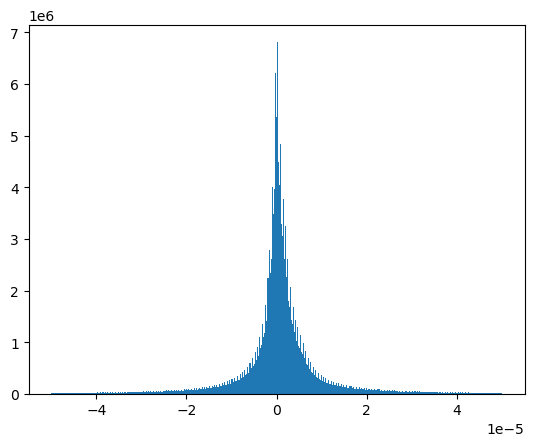

In [ ]:
plt.hist(val_scores_raw,bins=500,range = (-.00005,.00005)); # jyh (11/27): this includes all scores (all classes), not just clothing. next step, extract just clothing -

In [ ]:
np.std(val_scores_raw)

0.007473

In [ ]:
np.mean(hoo_scores_raw)

0.000967

In [ ]:
# np.std() outputs inf for hoo_scores_raw; don't know why
def calculate_standard_deviation(data):
    # Calculate the mean (average) of the data
    mean = sum(data) / len(data)

    # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data]

    # Calculate the variance (average of squared differences)
    variance = sum(squared_diff) / len(data)

    # Calculate the standard deviation (square root of the variance)
    standard_deviation = math.sqrt(variance)

    return mean, standard_deviation

In [ ]:
calculate_standard_deviation(hoo_scores_raw)

0.017690595432967495

In [ ]:
calculate_standard_deviation(val_scores_raw)

(0.00030525210531979515, 0.007527707943874181)

In [ ]:
def get_mean(scores):
    means = []
    for i in range(len(scores)):
        vector = scores[i]
        means.append(np.mean(vector))
    return means

In [ ]:
val_means = get_mean(_scores_val)
hoo_means = get_mean(_scores_hoo)

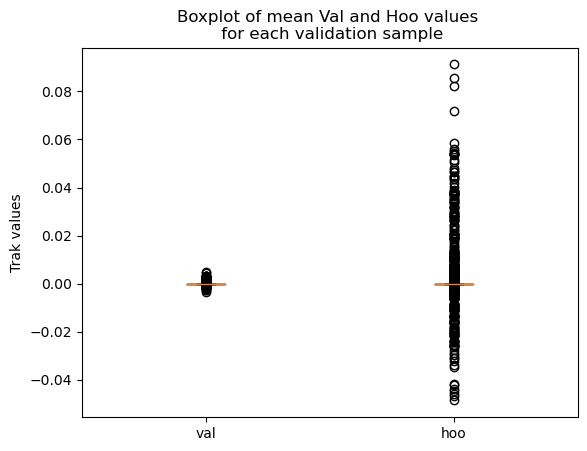

In [ ]:
data_to_plot = [val_means, hoo_means]

# Create a box plot
plt.boxplot(data_to_plot)

# Customize the plot (optional)
plt.title(f'Boxplot of mean Val and Hoo values \n for each validation sample')
plt.xticks([1, 2], ['val', 'hoo'])
plt.ylabel('Trak values')

# Show the plot
plt.show()

In [ ]:
# there seems to be some negative values here. Is that ok?
# _scores_val[_scores_val < 0] = 0
# _scores_hoo[_scores_hoo < 0] = 0
_scores_val[_scores_val < 0] = np.abs(_scores_val[_scores_val < 0])
_scores_hoo[_scores_hoo < 0] = np.abs(_scores_hoo[_scores_hoo < 0])

# UPDATE 11/27: Don't change the negative values

In [ ]:
def kl_divergence(p, q):
    # return np.sum(p[i] * np.log(p[i]/q[i]) for i in range(len(p)))
    return entropy(p,q)

In [ ]:
target_size = 29227

In [ ]:
base_uniform = [1/target_size]*target_size
np.sum(base_uniform)

1.0000000000000002

In [ ]:
_scores_val = _scores_val.T
_scores_hoo = _scores_hoo.T

In [ ]:
kl_divergence(_scores_val[62],base_uniform)

4.027825842667282

In [ ]:
def nm(vector):
    min_val = np.min(vector)
    max_val = np.max(vector)
    normalized_vector = (vector - min_val) / (max_val - min_val)
    return normalized_vector

In [ ]:
def get_divergence(scores, base_distribution):
    metrics = []
    for i in range(len(scores)):
        vector = scores[i]
        divergence = kl_divergence(sorted(nm(vector)),base_distribution)
        metrics.append(divergence)
    return metrics

In [ ]:
val_div = get_divergence(_scores_val,base_uniform)
hoo_div = get_divergence(_scores_hoo,base_uniform)

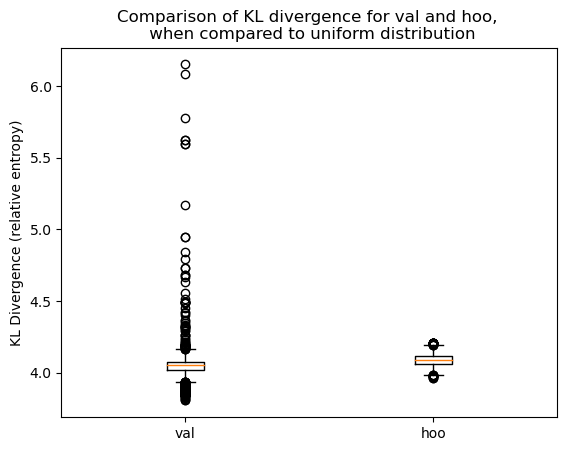

In [ ]:
# Example data (replace these with your own lists)

# Create a list of data for the box plot
data_to_plot = [val_div, hoo_div]

# Create a box plot
plt.boxplot(data_to_plot)

# Customize the plot (optional)
plt.title('Comparison of KL divergence for val and hoo, \n when compared to uniform distribution')
plt.xticks([1, 2], ['val', 'hoo'])
plt.ylabel('KL Divergence (relative entropy)')

# Show the plot
plt.show()

In [ ]:
def p_sum(values,percentile):
    sorted_values = sorted(values, reverse=True)

    # Calculate the index that corresponds to the top 20 percent
    top_20_percent_index = int(percentile * len(sorted_values))

    # Take the top 20 percent of values
    top_20_percent_values = sorted_values[:top_20_percent_index]

    # Calculate the total sum of the list
    total_sum = sum(values)

    # Calculate the sum of the top 20 percent of values
    top_20_percent_sum = sum(top_20_percent_values)

    # Calculate the percentage of the total sum accounted for by the top 20 percent
    percentage_accounted_for = (top_20_percent_sum / total_sum) * 100

    print(f"Percentage accounted for by top {percentile*100} percent:", percentage_accounted_for)

    return percentage_accounted_for

In [ ]:
# TODO: Set random seeds for different percentage thresholds we want to compare our results to

In [ ]:
import math

alpha_p = math.log(5) / math.log(9)
pareto_values = np.random.pareto(alpha_p,29227)
percentile = 0.01
pareto_p = p_sum(pareto_values,percentile)

Percentage accounted for by top 1.0 percent: 93.03029033178318


In [ ]:
p_sum(_scores_val[0],percentile)

Percentage accounted for by top 1.0 percent: 83.09599933806423


83.09599933806423

In [ ]:
entropy(sorted(_scores_val[0]),sorted(nm(pareto_values)))

0.9480901949273014

In [ ]:
pareto_base = sorted(nm(pareto_values))
val_div_pareto = get_divergence(_scores_val,sorted(pareto_base))
hoo_div_pareto = get_divergence(_scores_hoo,sorted(pareto_base))

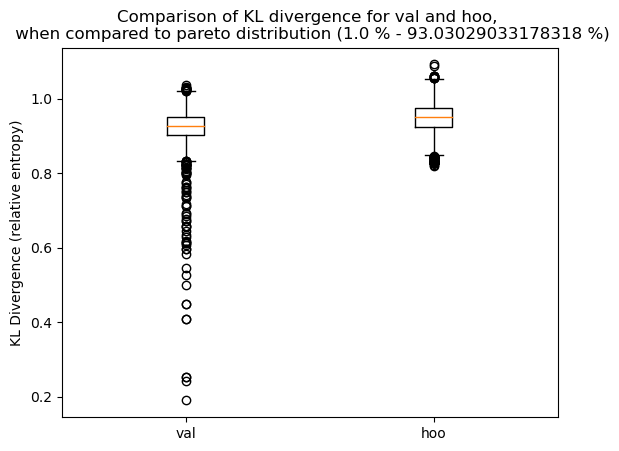

In [ ]:
data_to_plot = [val_div_pareto, hoo_div_pareto]

# Create a box plot
plt.boxplot(data_to_plot)

# Customize the plot (optional)
plt.title(f'Comparison of KL divergence for val and hoo, \n when compared to pareto distribution ({percentile*100} % - {pareto_p} %)')
plt.xticks([1, 2], ['val', 'hoo'])
plt.ylabel('KL Divergence (relative entropy)')

# Show the plot
plt.show()